# Introductory Statistics in Python - Session 2
The workshop addresses the fundamentals of statistics management with Python. The objective is to give the student the fundamental knowledge to perform main statistical tasks in Python. The Python codes will be written and executed in Jupyter Notebook. Students will be provided with the necessary datasets to be able to run the codes.

In the second session, we will cover more statistical concepts, starting with the Central Limit Theorem (CLT) and its applications in various summary statistics. We will explore additional probability distributions using `scipy.stats`, including Poisson, Exponential, Student's t, and Log-normal. The session concludes with practical insights into correlation in Python, emphasizing visualization techniques and variable transformations for effective data analysis.

### Lecturer: Esteban Cabrera (esteban.cabrera@pucp.edu.pe)

## **Table of Contents**

- <a href='#t4'>4. The Central Limit Theorem</a> 
     - <a href='#4.1.'>4.1. The CLT in action</a>
     - <a href='#4.2.'>4.2. The CLT in other summary statistics</a>
- <a href='#t5'>5. More distributions with scipy.stats</a>
     - <a href='#5.1.'>5.1. Poisson</a>
     - <a href='#5.2.'>5.2. Exponential</a>
     - <a href='#5.3.'>5.3. Student's t</a>
     - <a href='#5.4.'>5.4. Log-normal</a>
- <a href='#t6'>6.Correlation in Python</a>  
    - <a href='#6.1.'>6.1. Visualizing correlation in Python</a>
    - <a href='#6.2.'>6.2 Transforming our variables</a>

In [1]:
>>> import math
>>> import statistics
>>> import numpy as np
>>> from scipy import stats
>>> import pandas as pd
>>> import matplotlib.pyplot as plt
>>> import seaborn as sns
>>> import warnings
>>> warnings.filterwarnings('ignore')

#  <a id='t4'> 4. Central Limit Theorem</a>

The Central Limit Theorem (CLT) is a fundamental concept in statistics that describes the behavior of sample means (or other sample statistics) when drawing multiple samples from a population, regardless of the shape of the population's distribution. The theorem states that as the sample size increases, the distribution of the sample means approaches a normal distribution, regardless of the shape of the original population distribution.

## <a id='4.1.'> 4.1 The CLT in action </a>

Let's illustrate it with an example. In the first session, we created a DataFrame called die, and simulated its roll by calling the `sample` function

In [2]:
die  = {'number': [1, 2, 3, 4, 5, 6]}
die  = pd.DataFrame(die)

In [3]:
# We can get the mean and std
print(f'The theoretical mean is: {np.mean(die)}')
print(f'The theoretical standard deviation is: {np.std(die)}')

The theoretical mean is: 3.5
The theoretical standard deviation is: number    1.707825
dtype: float64


In [4]:
# Roll 5 times
sample_5 = die.sample(5, replace=True).reset_index().drop(columns=['index'])

sample_5

,number
0,3
1,4
2,3
3,1
4,1


We can take the sample mean, which will we close the expected value

In [5]:
np.mean(sample_5)

2.4

If we roll it another five times we will get another mean, which also could be close to the expected value.

In [6]:
# Roll another 5 times and take the mean
sample_5 = die.sample(5, replace=True)
np.mean(sample_5)

2.8

We can repeat this 10 times, using a `for loop` and appending the mean of each 5 rolls sample

In [7]:
sample_means = []

for i in range(10):
    sample_5 = die.sample(5, replace=True)
    sample_means.append(np.mean(sample_5))  

print(sample_means)

[4.4, 2.2, 3.8, 3.6, 3.2, 4.8, 5.4, 3.0, 2.6, 4.6]


We can plot these sample means. A summary statistic lie this is called sampling distribution.

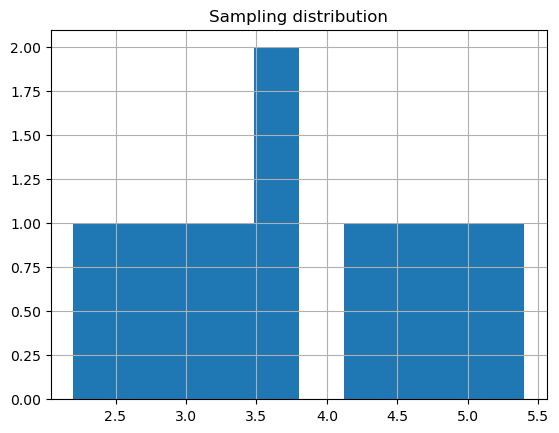

In [8]:
sample_means = pd.DataFrame(sample_means)
sample_means.hist()
plt.title('Sampling distribution')
plt.show()

We can repeat the sampling 100 times and get a distribution that resembles a normal distribution

In [9]:
sample_means = []

for i in range(100):
    sample_5 = die.sample(5, replace=True)
    sample_means.append(np.mean(sample_5))  

print(sample_means)

[4.8, 3.0, 4.6, 2.6, 3.8, 5.6, 3.2, 5.0, 3.4, 4.8, 4.2, 3.4, 3.6, 2.8, 3.4, 3.6, 3.6, 4.8, 3.8, 3.4, 4.4, 4.0, 3.6, 2.8, 4.0, 3.6, 4.4, 4.8, 3.2, 3.4, 4.0, 2.8, 3.8, 3.6, 4.4, 3.8, 3.6, 3.0, 3.2, 4.4, 3.8, 2.8, 2.8, 3.4, 4.0, 3.0, 3.8, 4.2, 3.0, 4.0, 3.2, 2.8, 4.6, 2.4, 4.0, 2.4, 3.4, 2.4, 3.2, 3.8, 4.2, 3.0, 4.8, 3.6, 3.4, 4.6, 3.8, 4.8, 5.4, 3.8, 3.6, 4.2, 3.6, 3.8, 3.0, 2.8, 2.4, 2.8, 3.4, 4.0, 3.8, 3.4, 3.2, 4.0, 2.6, 2.0, 4.0, 3.8, 2.8, 3.0, 3.4, 2.8, 1.8, 3.4, 2.2, 2.6, 4.0, 3.8, 2.8, 4.6]


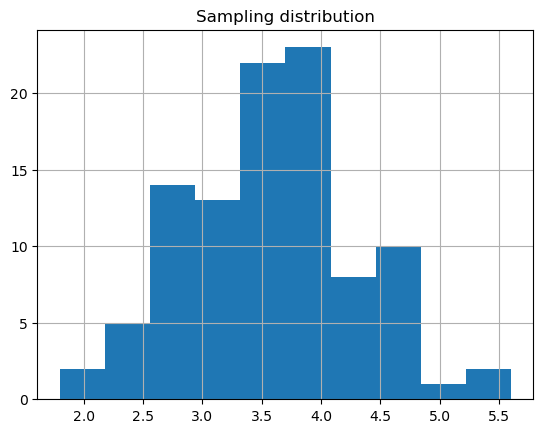

In [10]:
sample_means = pd.DataFrame(sample_means)
sample_means.hist()
plt.title('Sampling distribution')
plt.show()

In [11]:
sample_means = []

for i in range(1000):
    sample_5 = die.sample(5, replace=True)
    sample_means.append(np.mean(sample_5))  

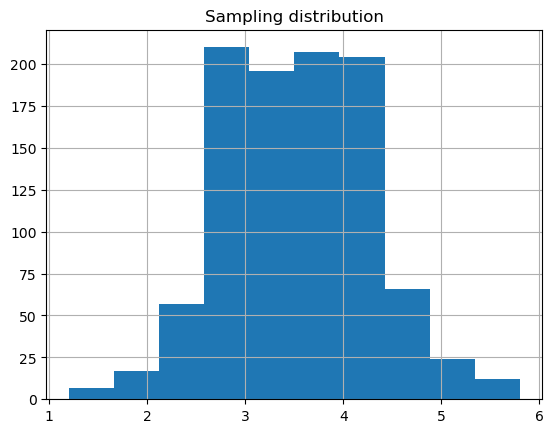

In [12]:
sample_means = pd.DataFrame(sample_means)
sample_means.hist()
plt.title('Sampling distribution')
plt.show()

If we do it 1000 times the ressemblance is even bigger. **This is the CLT in action!** Even though the original distribution of the die was uniform, the sampling distribution becomes closer and closer to a normal distribution as the number of trials increases. Let's finally do 10000 trials!

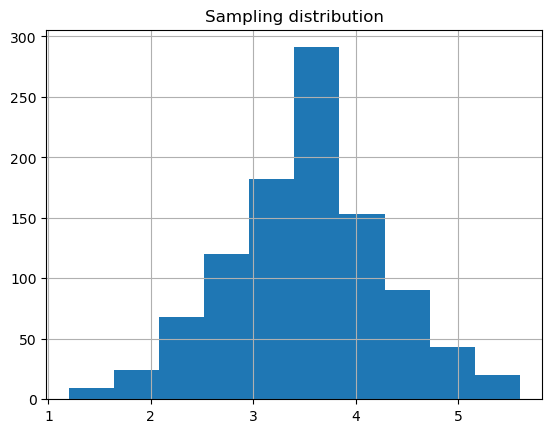

In [13]:
sample_means = []

for i in range(1000):
    sample_5 = die.sample(5, replace=True)
    sample_means.append(np.mean(sample_5))

sample_means = pd.DataFrame(sample_means)
sample_means.hist()
plt.title('Sampling distribution')
plt.show()

The Central Limit Theorem (CLT) is applicable in situations where data is collected through **random sampling**, ensuring that each observation is **independent** of the others. For the CLT to hold, the sample size should ideally be sufficiently large, with a common guideline suggesting a minimum of **30 observations**.

## <a id='4.2.'> 3.2 The CLT in other summary statistics </a>
The CLT can be applied to other summary statistics as well, like the standard deviation, the median and proportions. 

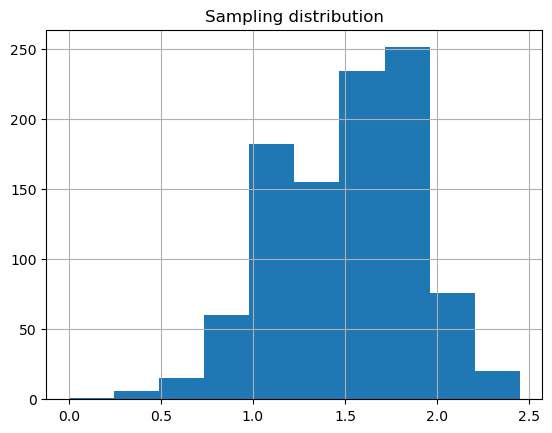

In [14]:
sample_std = []

for i in range(1000):
    sample_5 = die.sample(5, replace=True)
    sample_std.append(np.std(sample_5))

sample_std = pd.DataFrame(sample_std)
sample_std.hist()
plt.title('Sampling distribution')
plt.show()

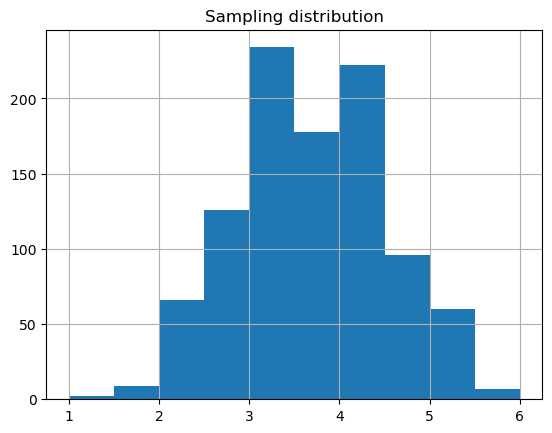

In [15]:
sample_median = []

for i in range(1000):
    sample_10 = die.sample(10, replace=True)
    sample_median.append(np.median(sample_10))

sample_median = pd.DataFrame(sample_median)
sample_median.hist()
plt.title('Sampling distribution')
plt.show()

We can get the mean of the `sample_means`, `sample_median` and `sample_std` and we will get a value pretty close to the expected mean, expected median and expected standard deviation

In [16]:
np.mean(sample_means)

3.501

In [17]:
np.mean(sample_std)

1.4992752403141654

In [18]:
np.mean(sample_median)

3.4475

We can now try it action with the deals database from the first session. We fill focus on the `num_user` column, which does not have a normal distribution

In [19]:
>>> deals = pd.read_csv('databases/deals.csv')
>>> deals.drop(columns=['Unnamed: 0'], inplace=True)
>>> deals.head()

,product,client,status,amount,num_users
0,Product F,Current,Won,7389.52,19
1,Product C,New,Won,4493.01,43
2,Product B,New,Won,5738.09,87
3,Product I,Current,Won,2591.24,83
4,Product E,Current,Won,6622.97,17


In [20]:
np.random.seed(42)

sample_means = []

# We loop 1000 times
for i in range(1000):
  # We take a sample of 25 num_users
  sample_25 = deals['num_users'].sample(25, replace=True)
  # We calculate mean of sample_25
  sample_25_mean = np.mean(sample_25)
  # We append sample_25_mean to sample_means
  sample_means.append(sample_25_mean)

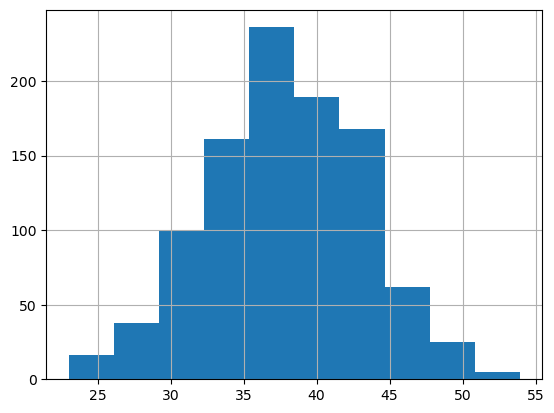

In [21]:
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

#  <a id='t5'> 5. More distributions</a>

## <a id='5.1.'> 5.1 Poisson distribution</a>

The Poisson Distribution models the probability of a certain number of events occurring within a fixed interval. It is characterized by a single parameter, $\lambda$ (lambda), representing the average rate of event occurrences. This distribution is particularly suitable for rare events, assuming independence between events and a constant average rate. The probability mass function provides the likelihood of observing a specific number of events in the given interval. With an expected value and variance both equal to $\lambda$, the Poisson Distribution is a concise and effective tool for modeling scenarios with low-probability events and a consistent average rate.

Some examples of Poisson distributions is the number of car accidents in a road in a given time frame, as it varies throughout the day and each day of the week. Other examples are the quantity of incoming calls during specific periods in a call centers or the number of pets adopted each week at an animal shelter.

[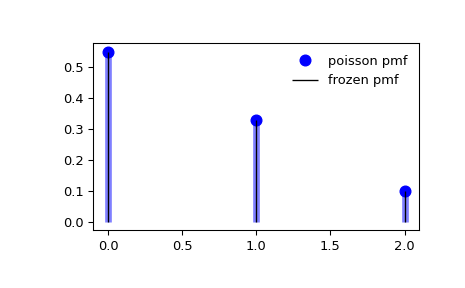](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson)


In [22]:
>>> from scipy.stats import poisson

For different lambda values, the poisson pmf will take different forms, with its peak at the lambda values

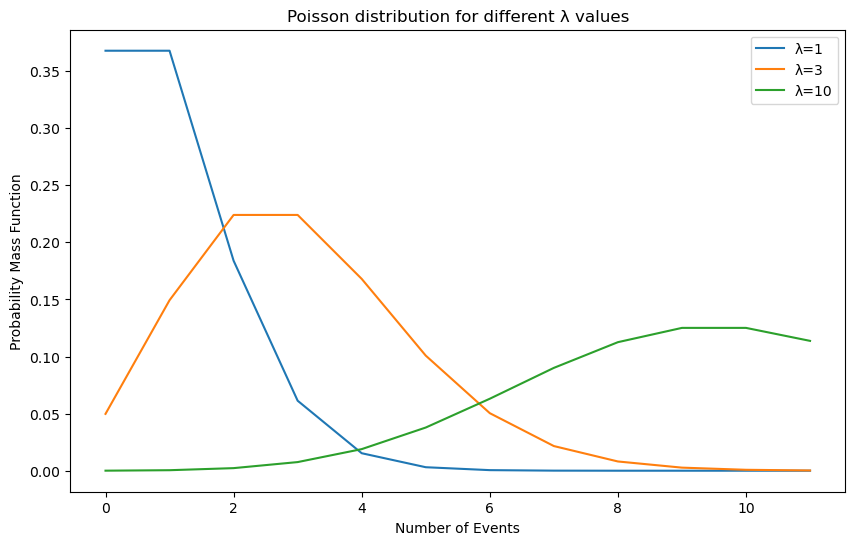

In [23]:
lambda_values = [1, 3, 10]

plt.figure(figsize=(10, 6))

# We plot the Poisson distributions for different lambdas
for lmbda in lambda_values:
    x = range(0, 12)
    plt.plot(x, poisson.pmf(x, lmbda), label=f'λ={lmbda}')

plt.title('Poisson distribution for different λ values')
plt.xlabel('Number of Events')
plt.ylabel('Probability Mass Function')
plt.legend()
plt.show()

Let's say that the usual number of car accidents in an hour on a busy road is 3. 

What is the probability of it being 5?

In [24]:
poisson.pmf(5, 3)

0.10081881344492458

What about the probability of 5 or fewer accidents?

In [25]:
poisson.cdf(5, 3)

0.9160820579686966

And the probability of more than 5 accidents?

In [26]:
1 - poisson.cdf(5, 3)

0.08391794203130343

Let's simulate the number of accidents the following 30 hours given than the average number of accidents is 3

In [27]:
accidents = poisson.rvs(3, size = 30)
accidents

array([1, 5, 7, 3, 3, 2, 5, 2, 5, 2, 1, 3, 3, 2, 5, 2, 8, 4, 6, 4, 1, 6,
       5, 8, 2, 2, 5, 4, 4, 5], dtype=int64)

Finally, we can apply the CLT to a poisson distribution

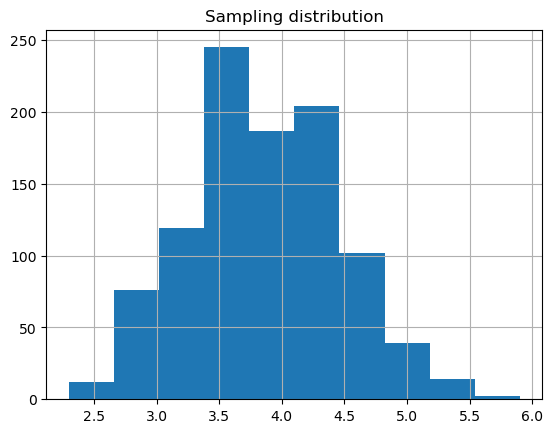

In [28]:
sample_mean = []

accidents = pd.Series(accidents)

for i in range(1000):
    sample_5 = accidents.sample(10, replace=True)
    sample_mean.append(np.mean(sample_5))

sample_mean = pd.DataFrame(sample_mean)
sample_mean.hist()
plt.title('Sampling distribution')
plt.show()

## <a id='5.2.'> 5.2 Exponential Distribution</a>

The Exponential Distribution models the time between independent and identically distributed events occurring at a constant average rate. It is characterized by a single parameter, $\lambda$ (lambda), representing the rate of event occurrences. This distribution is commonly used to describe the waiting time until the next event in a sequence which follows a Poisson distribution. The probability density function provides the likelihood of waiting a specific amount of time before the next event. It has an expected value (mean) equal to 1/$\lambda$ and a standard deviation equal to 1/$\lambda$. Unlike the Poisson distribution, it is continuous as it represents time.

Some examples of Exponential Distributions is the probability of less than thirty minutes between one car accident and the other, the probability of one hour between two phone calls at a call centers or the probability of less than two days between two adoptions at an animal shelter.

[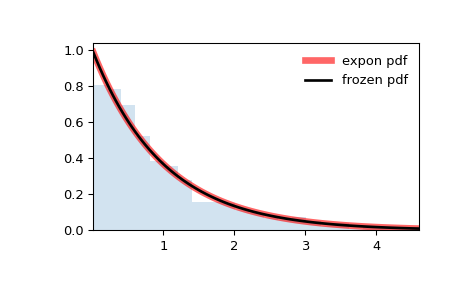](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon)

In [29]:
>>> from scipy.stats import expon

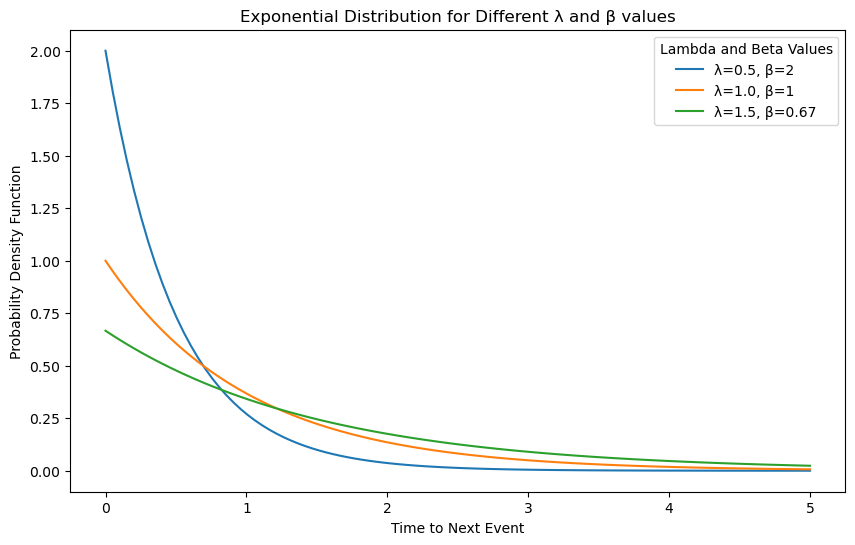

In [30]:
beta_values = [2, 1, 2/3]

plt.figure(figsize=(10, 6))

# Plotting the Exponential distributions for different betas
for beta in beta_values:
    x = np.linspace(0, 5, 100)
    lmbda = 1 / beta  # Calculate lambda from beta
    plt.plot(x, expon.pdf(x, scale=lmbda), label=f'λ={lmbda}, β={round(beta, 2)}')

plt.title('Exponential Distribution for Different λ and β values')
plt.xlabel('Time to Next Event')
plt.ylabel('Probability Density Function')
plt.legend(title="Lambda and Beta Values")
plt.show()

We have to remember that $\lambda$ is the expected value of the Poisson distribution, which is measuring frequency in terms of rate or number of events. The expected value for the Exponential distribution is $\beta$, which is measuring frequency in terms of time between events. That means that $\beta = 1/\lambda$

In our example with car accidents, if we have a Poisson distribution with $\lambda = 3$, that means we are expecting 3 car accidents in one hour. The Exponential distribution would have $\beta=1/3$ meaning that, on average, every third of an hour there will be an accident.

What would be the probability of waiting less than 1 hour for a car accident to occur?

In [31]:
expon.cdf(1, scale=1/3)

0.950212931632136

And what about waiting more than half an hour?

In [32]:
1 - expon.cdf(0.5, scale=1/3)

0.2231301601484298

What about the probability of waiting between thirty minutes and one hour?

In [33]:
expon.cdf(1, scale=1/3) - expon.cdf(0.5, scale=1/3)

0.17334309178056584

## <a id='5.3.'> 5.3 Student's t-Distribution </a>

The Student's t-Distribution models the distribution of a random variable when the sample size is small and the underlying population follows a normal distribution. It is characterized by a single parameter, degrees of freedom (df), denoted as $\nu$ (nu), which determines the shape of the distribution. The t-Distribution resembles the standard normal distribution but has heavier tails, making it more robust for small sample sizes. This distribution is widely used in statistical inference for hypothesis testing and constructing confidence intervals when dealing with small sample datasets. The probability density function of the t-Distribution provides the likelihood of observing a particular value, and as the degrees of freedom increase, it converges towards the normal distribution.

[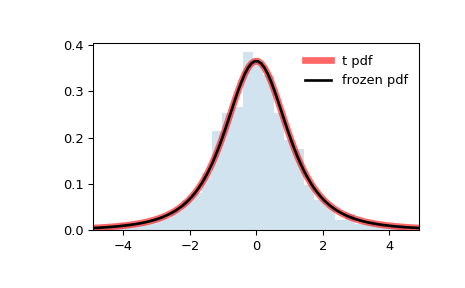](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t)

Some real-life examples that follow a Student's t-Distribution are blood pressure readings from a small group of patients, assessment scores from a small classroom or group of students or small-scale surveys or economic studies with a limited number of observations. This distribution is particularly useful when dealing with situations where assumptions about normality may be questionable, and the sample size is not large enough for the CLT to fully apply.

In [34]:
>>> from scipy.stats import t
>>> from scipy.stats import norm

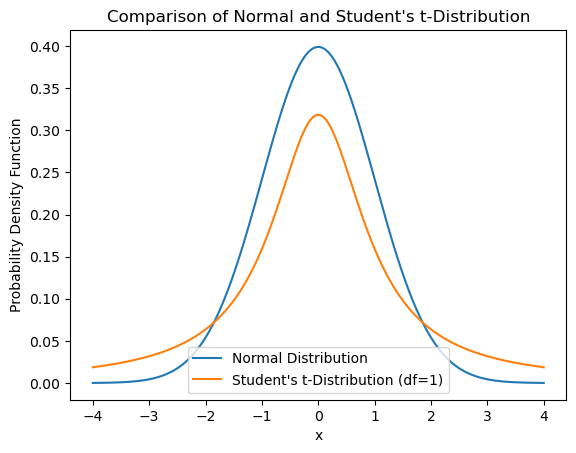

In [35]:
x = np.linspace(-4, 4, 1000)

# Normal distribution
plt.plot(x, norm.pdf(x), label='Normal Distribution')

# Student's t-distribution with 1 degree of freedom (df)
plt.plot(x, t.pdf(x, 1), label='Student\'s t-Distribution (df=1)')


plt.title('Comparison of Normal and Student\'s t-Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density Function')
plt.legend()
plt.show()

We observe that the standard normal distribution has thinner tails and a more symmetric shape, while the t-distribution with 1 degree of freedom exhibits heavier tails, indicating greater probability mass in the extreme values. 

This heavier tail behavior reflects an increased uncertainty and sensitivity to extreme observations due to the lower degrees of freedom. As we increase the degrees of freedom, the t-Distribution will ressemble more a Normal Distribution

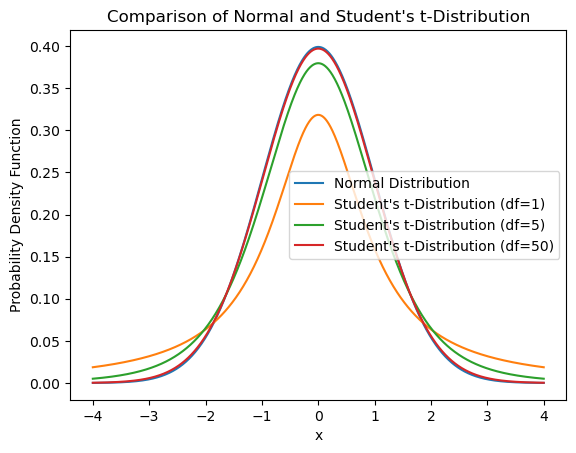

In [36]:
x = np.linspace(-4, 4, 1000)

# Normal distribution
plt.plot(x, norm.pdf(x), label='Normal Distribution')

# Student's t-distribution with different degrees of freedom
degrees_of_freedom = [1, 5, 50]
for df in degrees_of_freedom:
    plt.plot(x, t.pdf(x, df), label=f'Student\'s t-Distribution (df={df})')

plt.title('Comparison of Normal and Student\'s t-Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density Function')
plt.legend()
plt.show()

Let's consider a scenario where we have a small sample of 10 students, and we want to calculate probabilities using the Student's t-distribution. 

The degrees of freedom for a small sample (n-1) = 9

Let's also consider that the sample mean is 13 and the standard deviation is 3

What is the probability of the average score being less than 15?

In [37]:
t.cdf(15, df=9, loc=13, scale=3)

0.739146536459292

How about the probability that the average score is more than 18?

In [38]:
1 - t.cdf(18, df=9, loc=13, scale=3)

0.06496543411379252

## <a id='5.4.'> 5.4 Log-normal Distribution </a>

The Log-Normal Distribution models the probability distribution of a random variable whose natural logarithm follows a normal distribution. It is characterized by two parameters: the mean ($\mu$) and the standard deviation ($\sigma$) of the associated normal distribution. The log-normal distribution is commonly used to represent positively skewed variables that exhibit multiplicative growth over time. In other words, if a random variable X is log-normally distributed, then the variable Y = ln(X) is normally distributed. This distribution is frequently applied in finance to model the distribution of stock prices and other economic variables. The probability density function of the log-normal distribution provides the likelihood of observing a specific value, and it is a valuable tool for modeling variables influenced by exponential factors.

[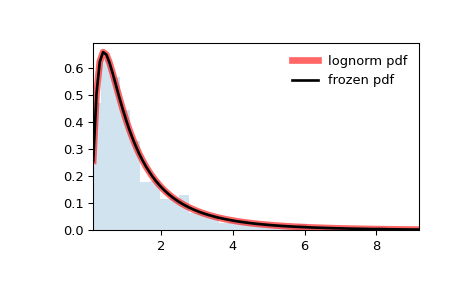](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html#scipy.stats.lognorm)

Economic variables such as income and wealth distribution may follow a log-normal distribution. Individuals' incomes tend to have a positive skewness, making the log-normal distribution suitable for modeling. Other examples are stock prices, which are often modeled using the log-normal distribution. Stock returns are typically assumed to follow a normal distribution, the prices, when taking the natural logarithm, become log-normally distributed.

In [39]:
>>> from scipy.stats import lognorm

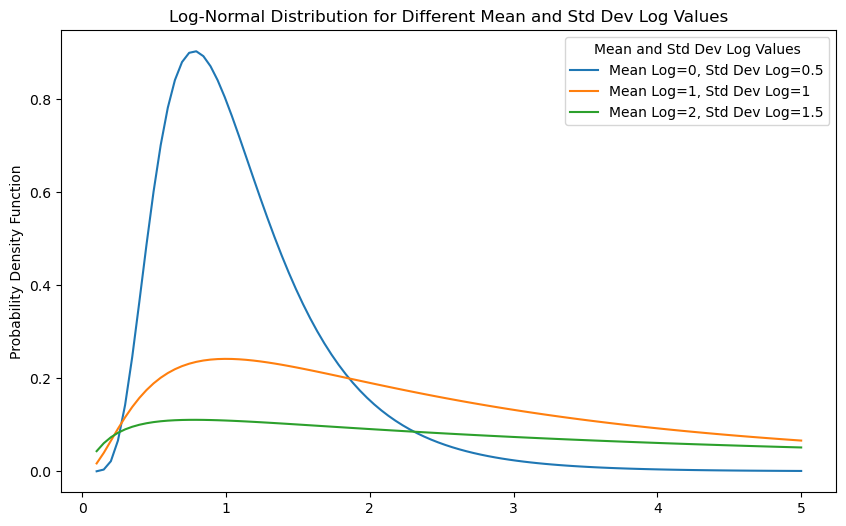

In [40]:
mean_log_list = [0, 1, 2]
std_dev_log_list = [0.5, 1, 1.5]

plt.figure(figsize=(10, 6))

# Plotting the Log-Normal distributions for different mean and standard deviation values
for mean_log, std_dev_log in zip(mean_log_list, std_dev_log_list):
    x = np.linspace(0.1, 5, 100)
    plt.plot(x, lognorm.pdf(x, s=std_dev_log, scale=np.exp(mean_log)), label=f'Mean Log={mean_log}, Std Dev Log={std_dev_log}')

plt.title('Log-Normal Distribution for Different Mean and Std Dev Log Values')
plt.ylabel('Probability Density Function')
plt.legend(title="Mean and Std Dev Log Values")
plt.show()

Let's consider the distribution of the duration of time a user spends on a website. On average, the user spends 2.5 hours, with a standard deviation 0.8 hours. 

What is the probability of spending less than 3 hours on the website?

In [41]:
lognorm.cdf(3, s=0.8, scale=np.exp(2.5))

0.039909723848106336

What about the probability of spending more than 4 hours on the website?

In [42]:
1 - lognorm.cdf(4, s=0.8, scale=np.exp(2.5))

0.9180587925306907

#  <a id='t6'> 6. Correlation in Python</a>

Correlation in statistics refers to the measure of the strength and direction of a linear relationship between two variables. It quantifies how changes in one variable correspond to changes in another. The correlation coefficient ranges from -1 to 1. 

- A correlation coefficient of 1 indicates a perfect positive linear relationship, meaning that as one variable increases, the other also increases proportionally.
- A correlation coefficient of -1 indicates a perfect negative linear relationship, indicating that as one variable increases, the other decreases proportionally.
- A correlation coefficient of 0 suggests no linear relationship between the variables.

It is important to clarify that  **correlation does not imply causation**, it only captures the linear association between variables. It is a valuable tool in understanding the degree of connection between two variables, helping to identify patterns and dependencies in data.

The Pearson correlation coefficient formula, also known as the Pearson product-moment correlation coefficient, is denoted by $r$ and is calculated using the following formula:

$ r = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n}(X_i - \bar{X})^2 \sum_{i=1}^{n}(Y_i - \bar{Y})^2}}$

where:
- $n$ is the number of data points,
- $X_i$ and $Y_i$ are the individual data points of variables $X$ and $Y$,
- $\bar{X}$ and $\bar{Y}$ are the means of variables $X$ and $Y$, respectively.

This formula calculates the covariance of the two variables divided by the product of their standard deviations, providing a normalized measure of their linear association.

Let's work with two datasets: world_happiness and housing. The first dataset contains information of the 2019 World Happiness Report. It shows the happiness levels of individuals in different countries and assigns scores accordingly. Additionally, it ranks each country in terms of societal factors, including social support, freedom, corruption, among others. The second one describes a Boston suburb with data drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970.

In [43]:
>>> world_happiness = pd.read_csv('../datasets/world_happiness.csv')
>>> world_happiness.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


In [44]:
>>> housing = pd.read_csv('../datasets/housing.csv')
>>> column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
>>> housing = pd.read_csv('databases/housing.csv', header=None, delimiter=r"\s+", names=column_names)
>>> housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## <a id='6.1.'> 6.1 Visualizing correlations in Python </a>

We can easily visualize the correlation between two variables using the `scatterplot` function in seaborn.

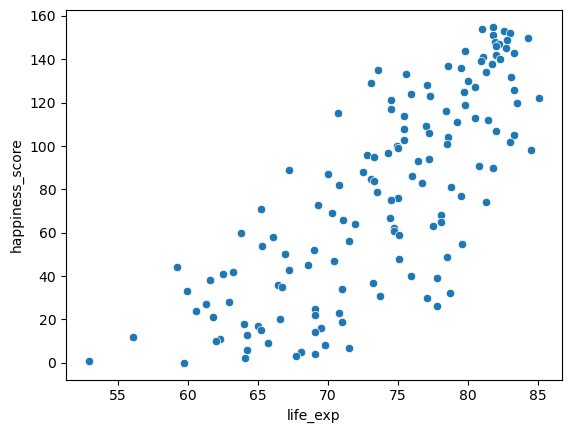

In [45]:
sns.scatterplot(data = world_happiness, x = 'life_exp', y = 'happiness_score')
plt.show()

We can a trend line to our plot using the `lmplot` function in seaborn

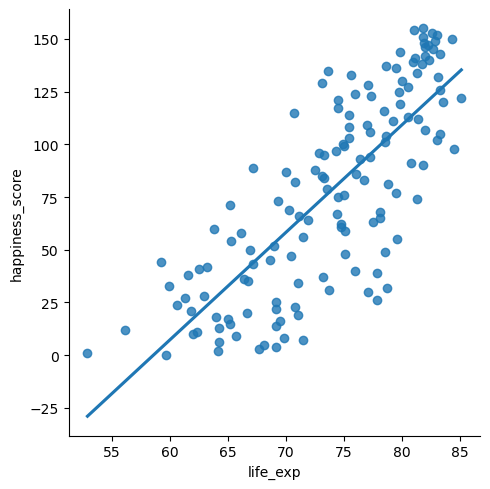

In [46]:
sns.lmplot(data = world_happiness, x = 'life_exp', y = 'happiness_score', ci= None)

plt.show()

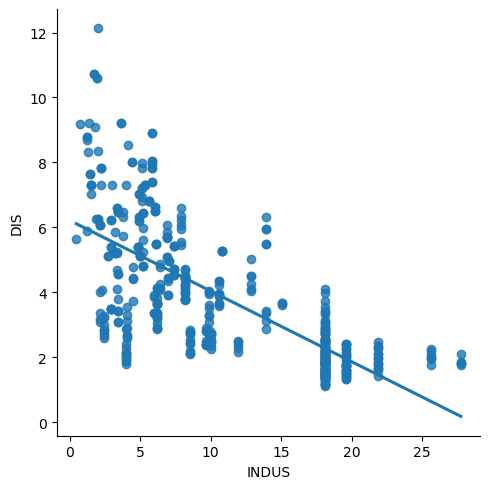

In [47]:
sns.lmplot(data = housing, x = 'INDUS', y = 'DIS',  ci= None)
plt.show()

We can see the correlation between two variables by using the `corr` function. In this case, the correlation between the proportion of non-retail business acres per town (INDUS) and the weighted distances to Boston employment centers (DIS) is negative

In [48]:
housing['INDUS'].corr(housing['DIS'])

-0.7080269887427683

Another way to visualize correlation between variables in a dataframe is using the `heatmap` function. The `heatmap` function visually represents correlations in a color-coded matrix, helping in the identification of relationships between variables. Additionally, it can help us identifying multicollinearity, helping us understand how variables may be interrelated and potentially influencing each other 

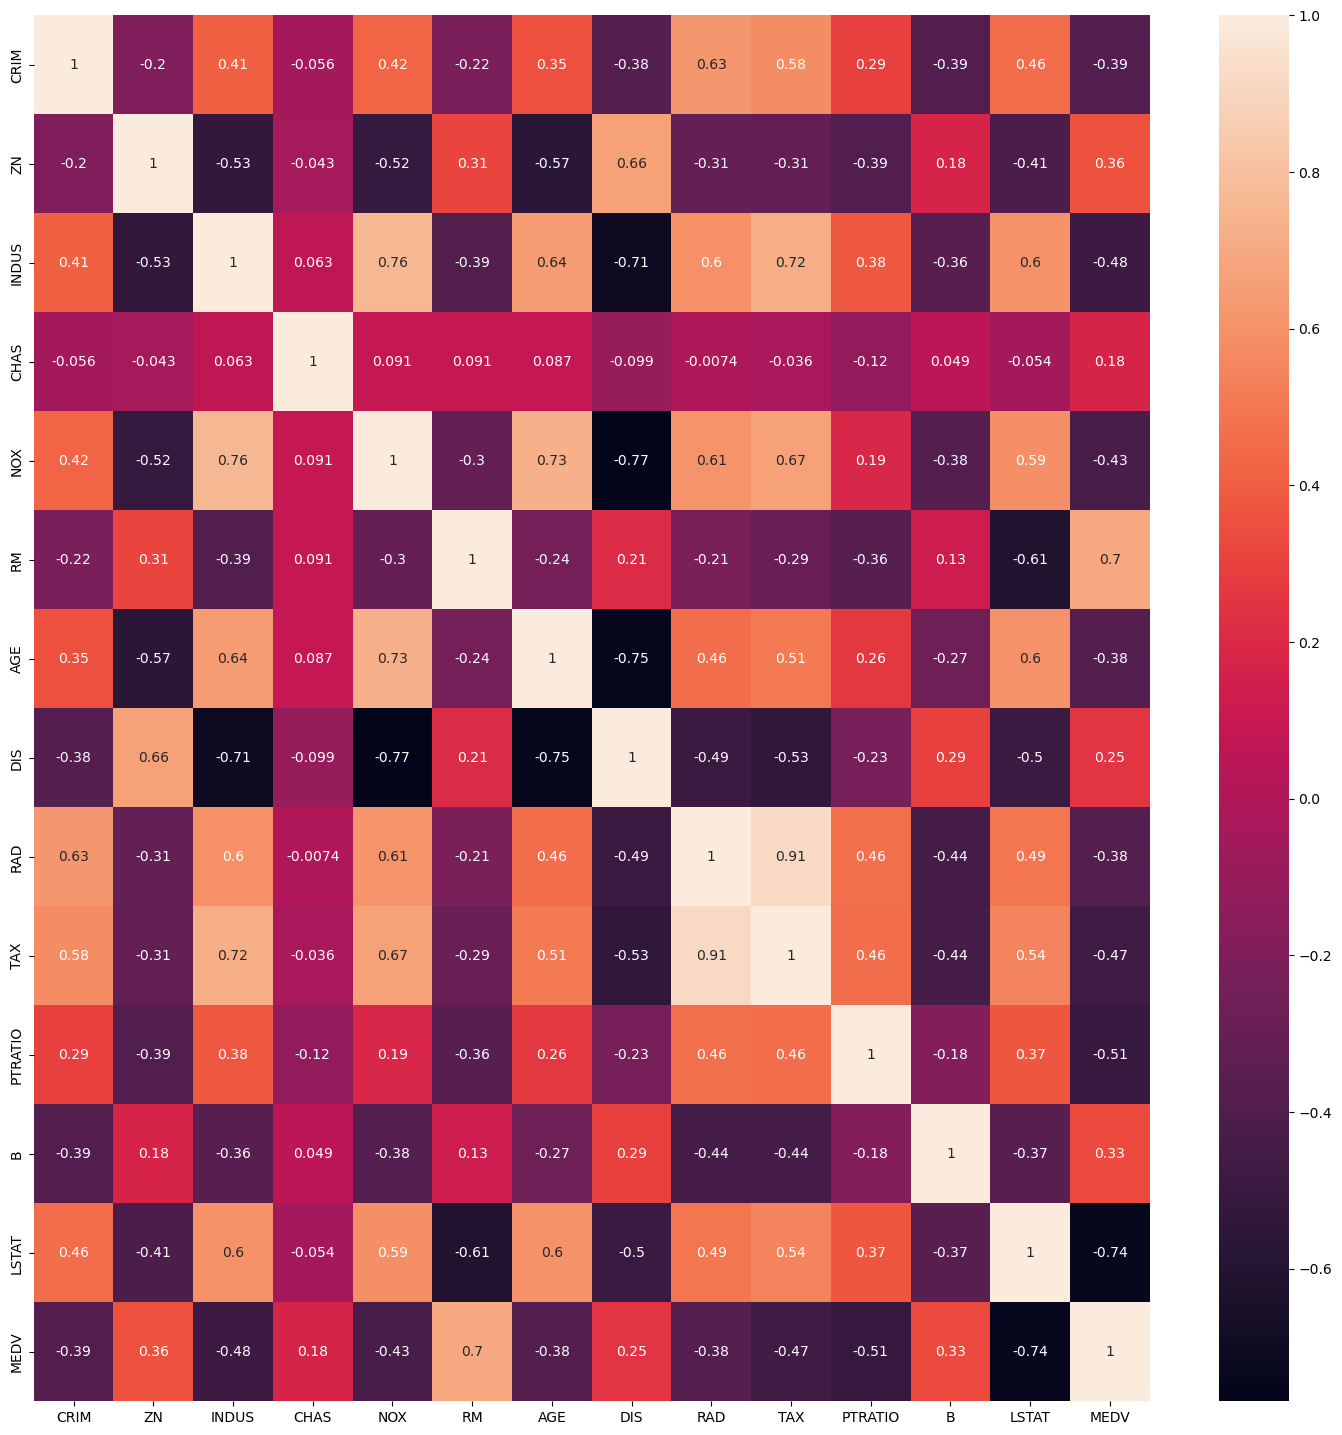

In [49]:
fig = plt.figure(figsize = (18,18))

sns.heatmap(housing.corr(), annot = True)   

plt.show()

We can change the color scheme with `cmap` and decide if we want to print the values of the Correlation Coefficient with `annot`

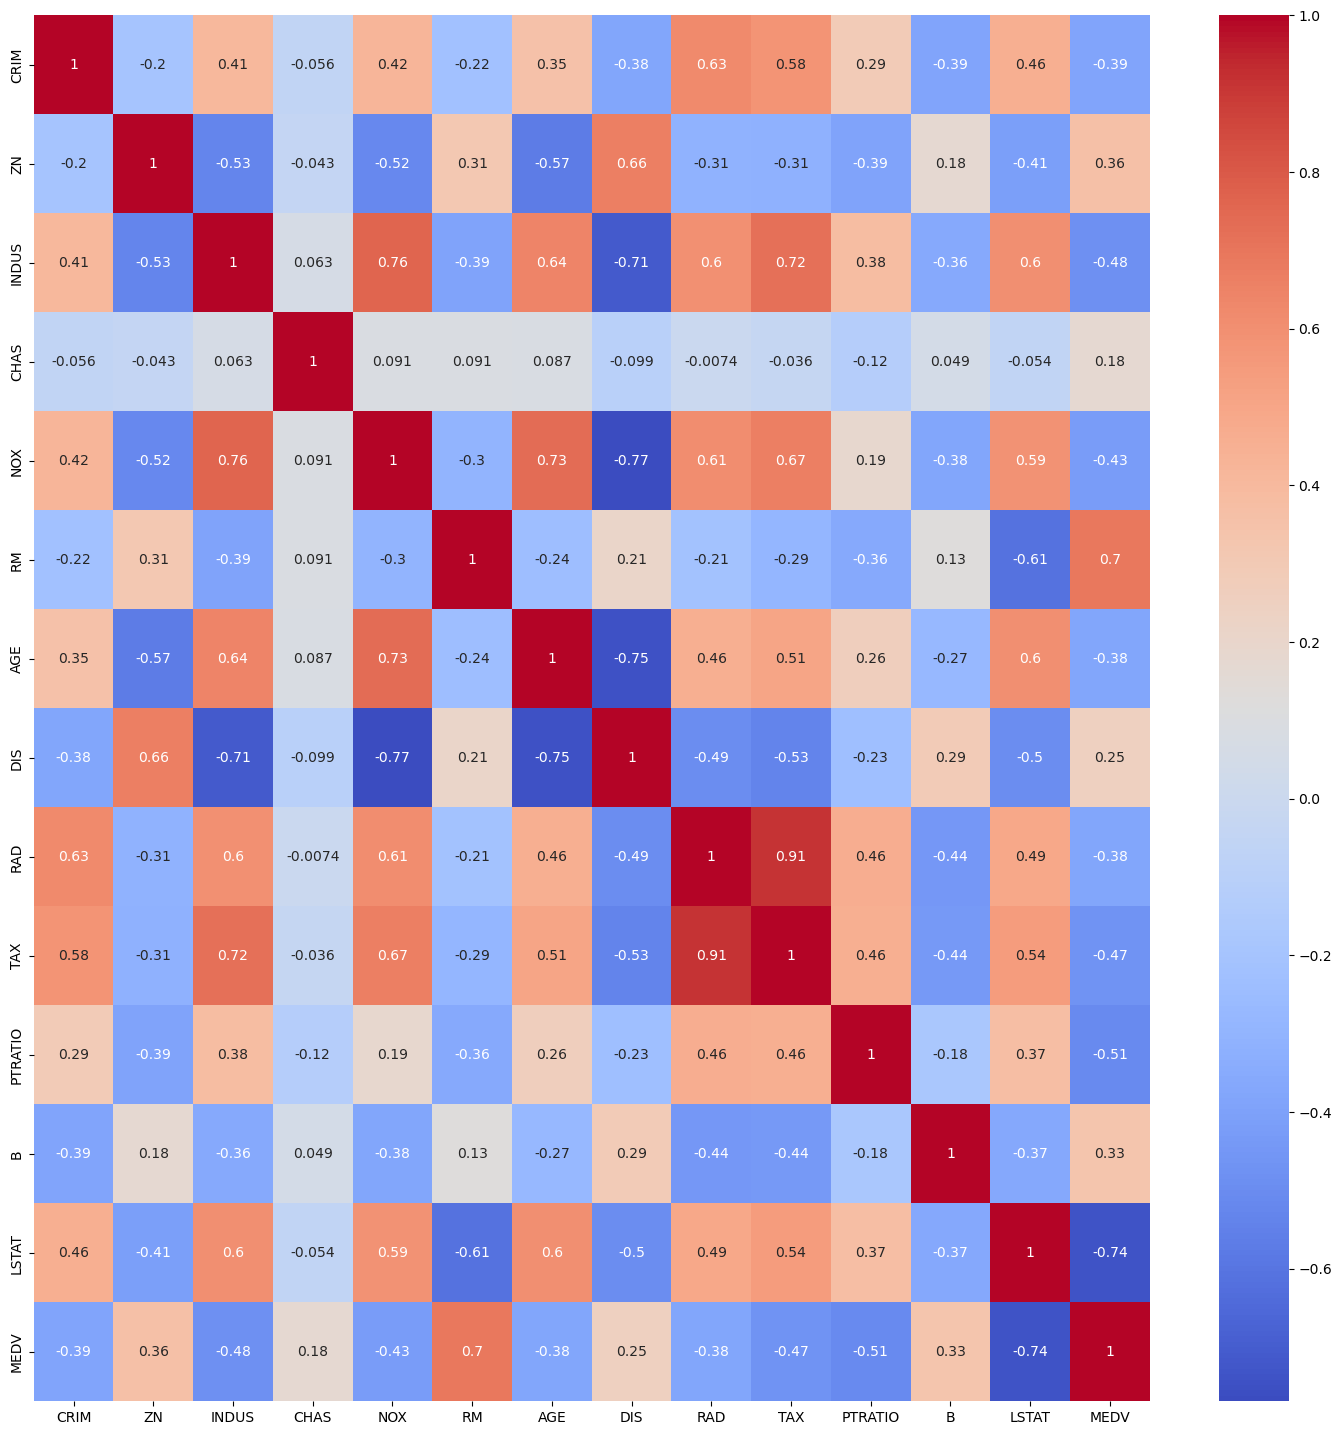

In [50]:
fig = plt.figure(figsize = (18,18))

sns.heatmap(housing.corr(), annot = True, cmap='coolwarm')   

plt.show()

## <a id='6.2.'> 6.2 Transforming our variables </a>

In some cases, the correlation between those variables is not linear. Let's take the example of 'gdp_per_cap' and 'life_exp' in the world_happiness dataset. There is a relationship, however, it is clearly not linear.

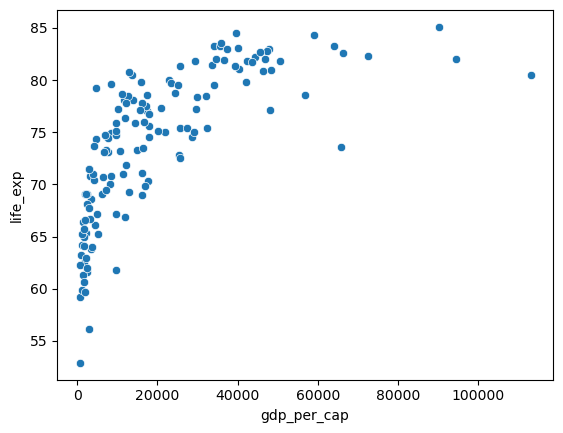

In [51]:
sns.scatterplot(data = world_happiness, x = 'gdp_per_cap', y='life_exp')

plt.show()

We can transform the gdp_per_cap variable by taking its log. By doing so, we can linearize the relationship between those two variables. If we plot again the scatterplot, the relationship now has a clear linear trend

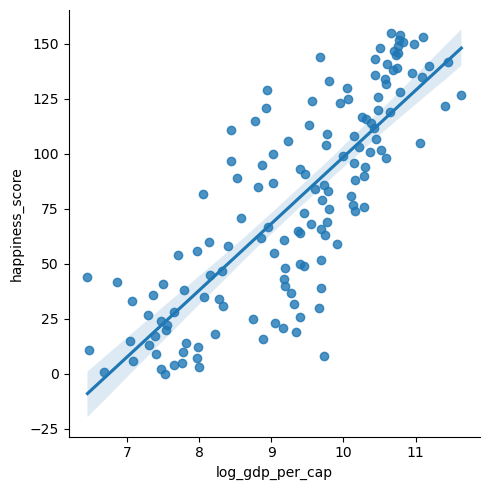

In [52]:
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

sns.lmplot(data=world_happiness, x = 'log_gdp_per_cap', y = 'happiness_score')
plt.show()

Something similar happends with 'ZN', the proportion of residential land zoned and 'CRIM', the per capita crime rate by town in the housing dataset. In levels, there is almost no linear relationship between those two variables

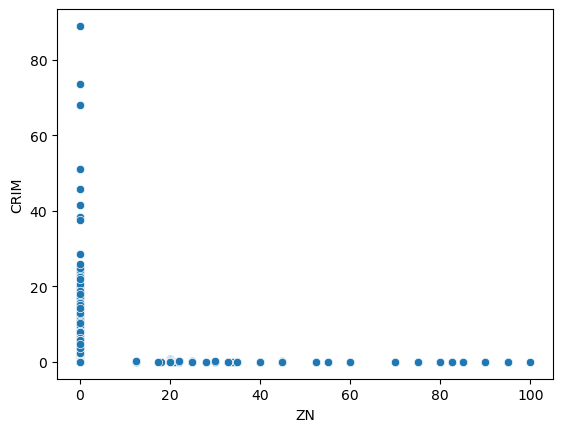

In [53]:
sns.scatterplot(data = housing, x = 'ZN', y = 'CRIM')
plt.show()

However, by taking the logarithm of both variables and plotting again the scatterplot, we can now observe a slighly more linear relationship.

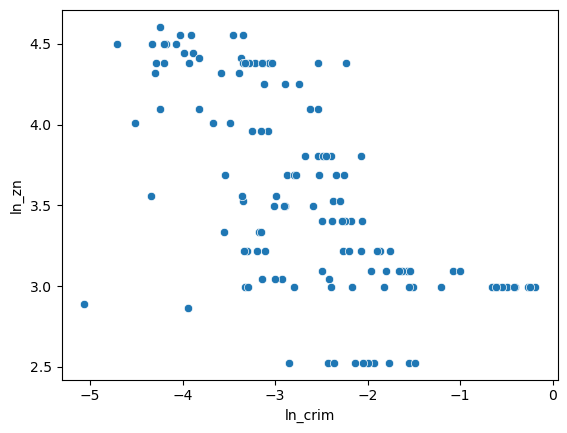

In [54]:
housing['ln_zn'] = np.log(housing['ZN'])
housing['ln_crim'] = np.log(housing['CRIM'])

sns.scatterplot(data = housing, x = 'ln_crim', y = 'ln_zn')
plt.show()

Correlation in statistics is fundamental for uncovering relationships between variables in datasets. The seaborn library facilitates the visualization of correlation matrices, offering valuable insights into the interdependence of variables. 